In [1]:
import dinkum
from dinkum.vfg import Gene, Receptor, Ligand
from dinkum.vfn import Tissue

## Let's build a simple oscillator!

![](images/2-oscillator.png)

Here, X is always on, and activates Y - which in turns activates Z, which then *represses* Y, in turn de-activating Z.

initializing: dinkum v0.6.0.dev0
start=1 stop=10


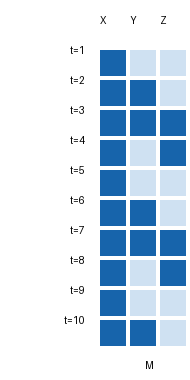

In [2]:
dinkum.reset()

x = Gene(name='X')
y = Gene(name='Y')
z = Gene(name='Z')
m = Tissue(name='M')

x.is_present(where=m, start=1)

# now define a regulatory relationship!
y.and_not(activator=x, repressor=z, delay=1)
z.activated_by(source=y)

# run for 20 ticks
dinkum.run_and_display(stop=10)

## Use the oscillations to send signals to neighboring tissues

Let's add in a signal to neighboring tissues:

![](images/2-oscillator-signal.png)

initializing: dinkum v0.6.0.dev0
start=1 stop=15


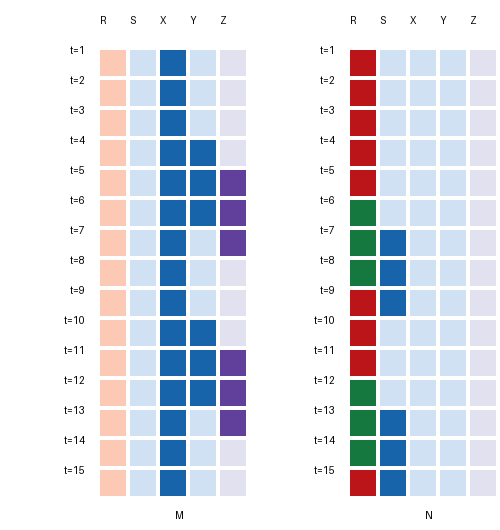

In [3]:
dinkum.reset()

x = Gene(name='X')
y = Gene(name='Y')
z = Ligand(name='Z')
r = Receptor(name='R', ligand=z)
s = Gene(name='S')

m = Tissue(name='M')
n = Tissue(name='N')

n.add_neighbor(neighbor=m)

x.is_present(where=m, start=1)

# now define a regulatory relationship that will be active in M:
y.and_not(activator=x, repressor=y, delay=3)
z.activated_by(source=y)

# and set up the receptor etc in N
r.is_present(where=n, start=1)

s.activated_by(source=r)

# run for 15 ticks (1 to 15)
display_fn, level_df, active_df = dinkum.run_and_display_df(stop=15)
display_fn

In [4]:
level_df

,tissue,timepoint_str,R,S,X,Y,Z
timepoint,,,,,,,
1,M,t=1,0,0,100,0,0
1,N,t=1,100,0,0,0,0
2,M,t=2,0,0,100,0,0
2,N,t=2,100,0,0,0,0
3,M,t=3,0,0,100,0,0
3,N,t=3,100,0,0,0,0
4,M,t=4,0,0,100,100,0
4,N,t=4,100,0,0,0,0
5,M,t=5,0,0,100,100,100
